In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats

read backtest results and generate daily returns dataframe

In [2]:
results = pd.read_pickle('results_strategy_2a_2008-2018.pickle')

In [3]:
returns = results.returns
returns.tail()

2018-10-25 20:00:00+00:00   -0.001402
2018-10-26 20:00:00+00:00   -0.035565
2018-10-29 20:00:00+00:00    0.005456
2018-10-30 20:00:00+00:00    0.009715
2018-10-31 20:00:00+00:00    0.019382
Name: returns, dtype: float64

number of daily return data points:

In [4]:
len(results)

2729

In [5]:
returns.reset_index(drop=True, inplace=True)

# Generate random paths by resampling from returns (with replacements)

change this parameter to get different number of paths

In [6]:
number_of_paths = 1000000

In [7]:
simulated_returns = pd.DataFrame(np.random.choice(returns, size=(len(returns), number_of_paths)))

In [8]:
simulated_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999
0,0.002459,0.017794,0.005265,0.008659,0.000049,0.003125,0.004895,0.006644,0.006294,-0.008170,...,-0.003065,0.004687,-0.008674,0.006881,-0.004311,0.006606,-0.009724,0.013808,0.001320,0.004550
1,0.026592,0.005806,0.020487,0.010131,-0.000991,0.029174,0.004012,0.010567,-0.015689,-0.010679,...,0.005053,-0.001947,-0.022032,0.001240,-0.002685,-0.012804,-0.008619,0.000535,-0.005603,0.013388
2,-0.006160,0.008569,-0.008520,0.006834,-0.016365,-0.005474,-0.003264,0.029017,0.062244,-0.007623,...,-0.018597,-0.006717,0.004703,-0.010916,0.013906,0.009745,0.005055,0.001082,0.028424,0.009462
3,0.032404,-0.011594,-0.002069,-0.022255,0.000310,0.018461,0.003287,-0.000873,0.009961,0.011477,...,-0.018074,-0.007997,-0.000124,0.002332,-0.018432,-0.031455,0.005291,0.005243,0.018051,0.028561
4,-0.010104,-0.021625,0.014688,0.000821,-0.028054,0.002908,0.003088,0.005378,0.005955,-0.012208,...,0.002531,0.023335,-0.009073,0.006823,-0.002276,0.016671,-0.029113,0.019479,-0.007136,-0.004337


# Quick visual on original vs. simulated distribution

actual distribution

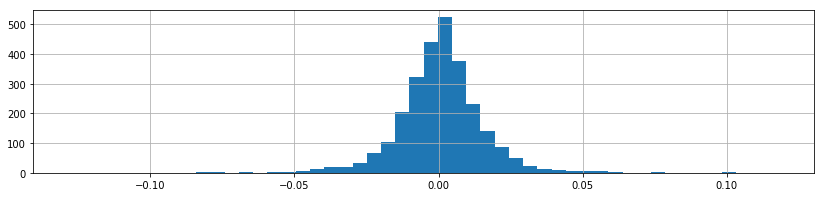

In [9]:
returns.hist(bins=50, figsize=(14,3));

simulated distribution

In [ ]:
pd.Series(simulated_returns.values.flatten()).hist(bins=50, figsize=(14,3));

# Stats for actual returns

In [ ]:
a=perf_stats(returns)
a

# Stats for simulated returns (median, max, min)

In [ ]:
ratios_for_paths = pd.DataFrame([perf_stats(x[1]) for x in simulated_returns.T.iterrows()])

median

In [ ]:
ratios_for_paths.median().T

max

In [ ]:
ratios_for_paths.max().T

min

In [ ]:
ratios_for_paths.min().T

# Probability that max drawdown less than x

In [ ]:
x = -.4
len(ratios_for_paths[ratios_for_paths['Max drawdown'] < x]) / number_of_paths

# Probability that Sharpe lower than y

In [ ]:
y = .6
len(ratios_for_paths[ratios_for_paths['Sharpe ratio'] < .6]) / number_of_paths

# Probability that annual return less than z

In [ ]:
z = .05
len(ratios_for_paths[ratios_for_paths['Annual return'] < z]) / number_of_paths

# Some distributions

Max drawdown

In [ ]:
ratios_for_paths['Max drawdown'].hist(bins=50, figsize=(14,3));

Sharpe

In [ ]:
ratios_for_paths['Sharpe ratio'].hist(bins=50, figsize=(14,3));

Annual return

In [ ]:
ratios_for_paths['Annual return'].hist(bins=50, figsize=(14,3));